# Import necessary libraries

In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from six import StringIO
import pydotplus
from IPython.display import Image

# Load the dataset

In [26]:
df = pd.read_csv('diabetess.csv')

print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature and target separation with train test split

In [27]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols]
Y = df['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Mode training and prediction

In [29]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize classifier
clf = DecisionTreeClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit
grid_search.fit(X_train, Y_train)

# Best estimator
best_clf = grid_search.best_estimator_

# Predictions
y_pred = best_clf.predict(X_test)



Fitting 5 folds for each of 90 candidates, totalling 450 fits


# Evaluation

In [35]:

# Accuracy
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Decision Tree Image

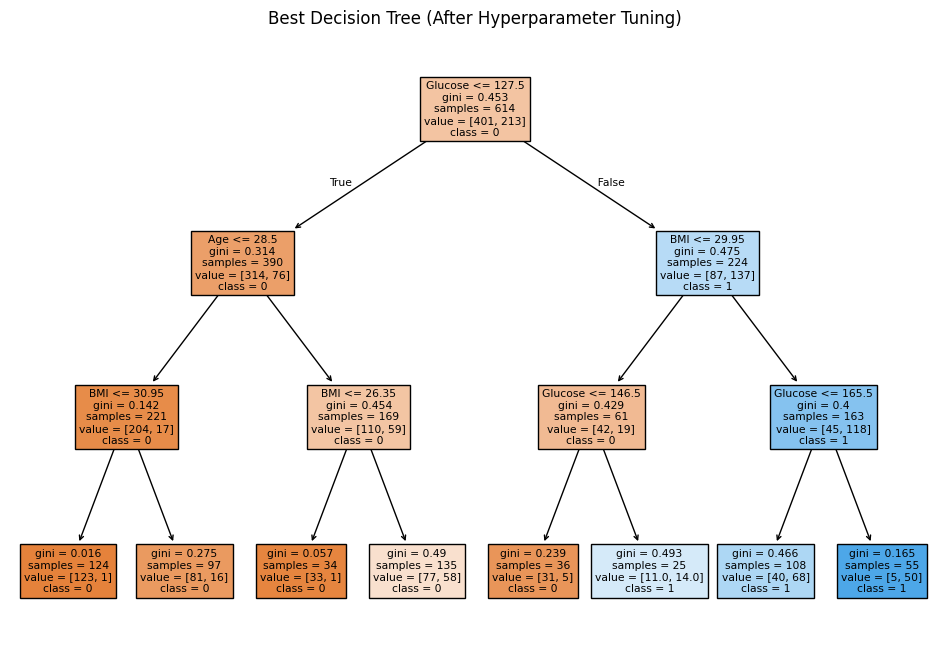

Best decision tree saved as 'best_diabetes_tree.png'


In [36]:


# Visualize the best tree
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=feature_cols, class_names=['0', '1'])
plt.title("Best Decision Tree (After Hyperparameter Tuning)")
plt.show()

# Save as image using Graphviz
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("best_diabetes_tree.png")
print("Best decision tree saved as 'best_diabetes_tree.png'")